In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv

scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.read('loom/9samples.h5ad')

In [5]:
ph_test

AnnData object with n_obs × n_vars = 2944 × 31907
    obs: 'barcode', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Type', 'percent.mt', 'percent.H', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'cell_type', 'sub_cell_type', 'integrated_snn_res.0.5', 'cluster', 'anno', 'PC_1', 'PC_2', 'TSNE_1', 'TSNE_2', 'UMAP_1', 'UMAP_2'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [6]:
ph_test.obsm['X_pca'] = ph_test.obs[['PC_1','PC_2']].values
ph_test.obsm['X_tsne'] = ph_test.obs[['TSNE_1','TSNE_2']].values
ph_test.obsm['X_umap'] = ph_test.obs[['UMAP_1','UMAP_2']].values

In [7]:
scv.utils.show_proportions(ph_test)

Abundance of ['spliced', 'unspliced']: [0.69 0.31]


In [8]:
scv.pp.filter_and_normalize(ph_test,min_shared_counts=30, n_top_genes=2000)

Filtered out 27807 genes that are detected 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.


In [9]:
scv.pp.moments(ph_test,n_neighbors=60)
scv.tl.velocity(ph_test, mode='stochastic')
scv.tl.velocity_graph(ph_test)

computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


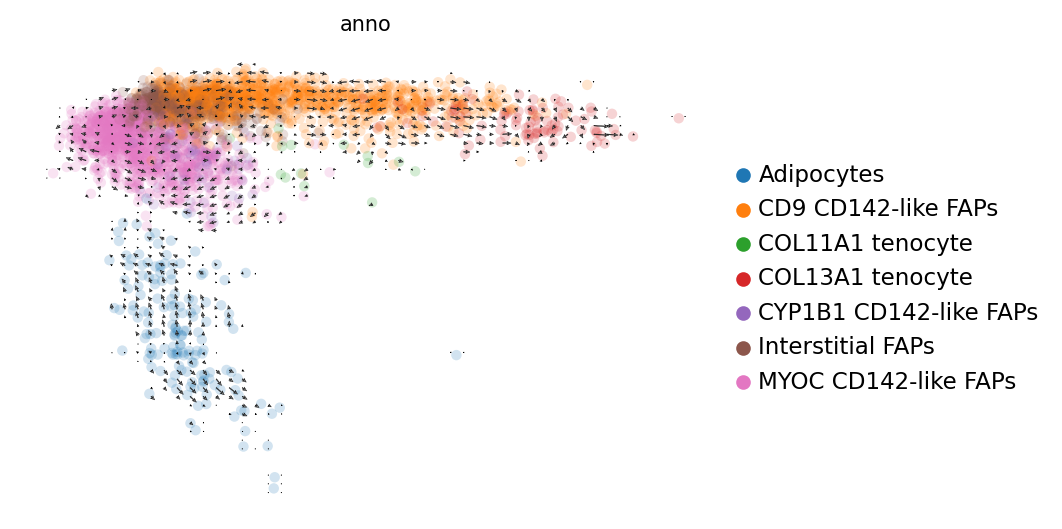

In [15]:
# scv.pl.velocity_embedding_grid(ph_test, basis='pca',dpi = 150 , color = 'anno',size=100,arrow_length=1,legend_loc = 'right')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_FAPs-Laiwu-pca-velocity.pdf


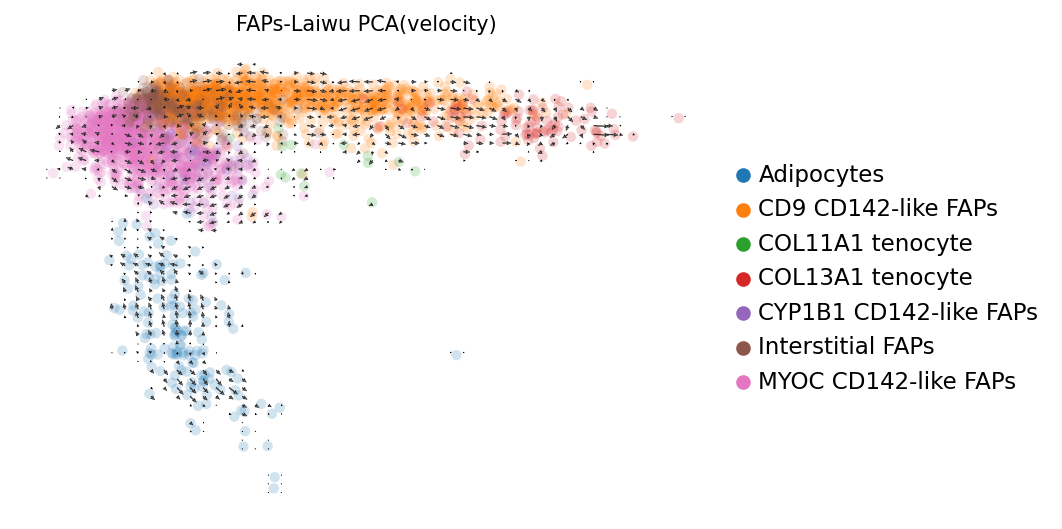

In [10]:

scv.pl.velocity_embedding_grid(ph_test, basis='pca',dpi = 150 , color = 'anno',size=100,arrow_length=1,
                               legend_loc = 'right',title='FAPs-Laiwu PCA(velocity)',save='FAPs-Laiwu-pca-velocity.pdf')